# Prueba Técnica - Científico de datos

Nombre: Jesus Alejandro Ovalles Torres

Fecha: 16/01/2024

# Planteamiento de la prueba

Una consultora que brinda servicios de analítica a empresas de cualquier sector realizó una encuesta a sus clientes para saber qué tan satisfechos están con los servicios ofrecidos:

•	bd_encuesta_Prueba_Cientifico_Junior: las encuestas de 70 clientes.

Como científico de datos, tienes la tarea de analizar la encuesta y generar información de valor para la empresa.

## 1.	(20%) Realice un análisis descriptivo detallado de las variables. 

¿Qué información de valor puedes entregarle a esta consultora a partir de tu análisis descriptivo?
	
## 2.	(40%) Utilizando al menos dos modelos supervisados, prediga la variable NPS (probabilidad de recomendación):


2.1	 Compare los modelos y seleccione el mejor, y explique cuál fue el criterio por el cual lo eligió. 

2.2	Cuáles son las variables que más influyen en esa probabilidad de recomendación del servicio. 


•	Tenga en cuenta que el NPS es: qué tan probable es que el cliente recomiende nuestros servicios, donde 0 es no recomendaría y 10 definitivamente sí lo recomendaría. Se consideran de 0 a 6 detractores, 7 y 8 pasivos y 9 y 10 promotores.


## 3.	(40%) La encuesta contiene dos preguntas que son de respuesta abierta, en donde los clientes pueden ampliar sus respuestas. (“Amplia la importancia de atributos” y “Cuéntanos el motivo de tu calificación”)

 
El gerente de la consultora quiere sacarles provecho a los comentarios dejados por sus clientes, además, él quiere implementar un sistema para analizar texto, que pueda ofrecer como un producto a sus clientes.

1.	(20%) Entregue conclusiones que puedan generar valor a la empresa a partir del análisis de estos comentarios. ¿Qué información de valor puedes extraer de los comentarios de los clientes? ¿Qué producto de análisis de texto puedes proponerle al gerente de la consultora?

2.	(20%) Explica como desplegarías este nuevo producto para que sea un proceso automatizado y atractivo para los clientes de la consultora.

# Solución

In [1]:
# importando librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
# importando el documento a trabajar
df = pd.read_excel("C:/Users/Alejandro/Desktop/Prueba cientifico de datos/bd_encuesta.xlsx")
df.head(2)

,Fecha,ID de respuesta,Nombre del cliente,Canal envio,Idioma del usuario,importancia_conocimiento_de_marcas: donde 1 es lo mas importante y 4 no lo consideras importante,importancia experiencia cliente: donde 1 es lo mas importante y 4 no lo consideras importante,importancia talento humano: donde 1 es lo mas importante y 4 no lo consideras importante,importancia tecnologia e innivación: donde 1 es lo mas importante y 4 no lo consideras importante,amplia la importancia de atributos,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,"En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo","En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?","NPS: escala del 0 al 10, donde 0 es no lo recomendaría y 10 definitivamente sí lo recomendaria. Dinos qué tan probable es que recomiendes nuestros servicios","NPS: En una escala de 0 a 10, donde 0 es la calificación más baja y 10 la más alta, ¿Qué tan probable es que recomiendes nuestros servicios?",Cuéntanos el motivo de tu calificación
0,2023-11-16 13:30:31.585,1,cliente 1,email,ES,2.0,3.0,4.0,1.0,amabilidad y comprension,Bueno,Malo,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Bueno,Promotor,9,Promotor,10,Tienen las competencias y capacidades necesari...
1,2023-11-16 14:54:57.335,2,cliente 2,email,ES,3.0,1.0,2.0,4.0,cercania,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Promotor,10,Promotor,10,siempre dispuestos a brindar la mejor asesoria...


# Procesamiento del dataset

In [3]:
# renombrar columnas para mejor visualización
df.rename(columns={"En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo": "¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo"}, inplace=True)
df.rename(columns={"En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?": "¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?"}, inplace=True)
df.rename(columns={"NPS: escala del 0 al 10, donde 0 es no lo recomendaría y 10 definitivamente sí lo recomendaria. Dinos qué tan probable es que recomiendes nuestros servicios": "NPS: Dinos qué tan probable es que recomiendes nuestros servicios"}, inplace=True)
df.rename(columns={"NPS: En una escala de 0 a 10, donde 0 es la calificación más baja y 10 la más alta, ¿Qué tan probable es que recomiendes nuestros servicios?": "NPS: ¿Qué tan probable es que recomiendes nuestros servicios?"}, inplace=True)
df.rename(columns={"importancia experiencia cliente: donde 1 es lo mas importante y 4 no lo consideras importante": "importancia experiencia cliente"}, inplace=True)
df.rename(columns={"importancia talento humano: donde 1 es lo mas importante y 4 no lo consideras importante": "importancia talento humano"}, inplace=True)
df.rename(columns={"importancia tecnologia e innivación: donde 1 es lo mas importante y 4 no lo consideras importante": "importancia tecnologia e innivación"}, inplace=True)
df.rename(columns={"importancia_conocimiento_de_marcas: donde 1 es lo mas importante y 4 no lo consideras importante": "importancia_conocimiento_de_marcas"}, inplace=True)

In [4]:
# eliminando columnas que no son relevantes por el momento para el analisis requerido
df.drop(columns=['Fecha', 'ID de respuesta', 'Nombre del cliente', 'Canal envio', 'Idioma del usuario', 'amplia la importancia de atributos', 'Cuéntanos el motivo de tu calificación'],inplace=True)
df.head(2)

,importancia_conocimiento_de_marcas,importancia experiencia cliente,importancia talento humano,importancia tecnologia e innivación,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo,¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?,NPS: Dinos qué tan probable es que recomiendes nuestros servicios,NPS: ¿Qué tan probable es que recomiendes nuestros servicios?
0,2.0,3.0,4.0,1.0,Bueno,Malo,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Bueno,Promotor,9,Promotor,10
1,3.0,1.0,2.0,4.0,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Promotor,10,Promotor,10


In [5]:
# buscando valores N/A
df.isna().sum()

importancia_conocimiento_de_marcas                                                        1
importancia experiencia cliente                                                           1
importancia talento humano                                                                1
importancia tecnologia e innivación                                                       1
Cómo calificas los resultados entregados en las consultorías?                             0
Cómo calificas la Metodología de desarrollo de los proyectos?                             0
Qué tan satisfecho estás con las alternativas dadas para tu solución?                     0
Qué tan satisfecho estás con los tiempo de solución ?                                     0
Cómo calificas la importancia que  le damos a nuestros clientes?                          0
Qué tan fácil fue obtener una solución?                                                   0
Que tan satisfecho estás con el conocimiento de nuestro personal?               

In [6]:
# reemplazando valores faltantes por la moda (valor mas comun)
for column in df.columns:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)

In [7]:
# buscando valores N/A
df.isna().sum()

importancia_conocimiento_de_marcas                                                        0
importancia experiencia cliente                                                           0
importancia talento humano                                                                0
importancia tecnologia e innivación                                                       0
Cómo calificas los resultados entregados en las consultorías?                             0
Cómo calificas la Metodología de desarrollo de los proyectos?                             0
Qué tan satisfecho estás con las alternativas dadas para tu solución?                     0
Qué tan satisfecho estás con los tiempo de solución ?                                     0
Cómo calificas la importancia que  le damos a nuestros clientes?                          0
Qué tan fácil fue obtener una solución?                                                   0
Que tan satisfecho estás con el conocimiento de nuestro personal?               

# Análisis Exploratorio de datos

In [8]:
# estadistica de la data numerica
df.describe().T

,count,mean,std,min,25%,50%,75%,max
importancia_conocimiento_de_marcas,70.0,2.185714,1.080698,1.0,1.00,2.0,3.0,4.0
importancia experiencia cliente,70.0,1.942857,1.033998,1.0,1.00,2.0,3.0,4.0
importancia talento humano,70.0,2.742857,1.002688,1.0,2.00,3.0,3.0,4.0
importancia tecnologia e innivación,70.0,3.128571,0.976854,1.0,2.00,3.0,4.0,4.0
¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?,70.0,8.742857,1.799241,1.0,8.00,9.0,10.0,10.0
NPS: ¿Qué tan probable es que recomiendes nuestros servicios?,70.0,8.657143,2.125659,1.0,8.25,9.0,10.0,10.0


In [9]:
# estadistica de la data categorica
df.describe(include = 'O').T

,count,unique,top,freq
Cómo calificas los resultados entregados en las consultorías?,70,4,Bueno,27
Cómo calificas la Metodología de desarrollo de los proyectos?,70,4,Muy bueno,33
Qué tan satisfecho estás con las alternativas dadas para tu solución?,70,4,Muy bueno,37
Qué tan satisfecho estás con los tiempo de solución ?,70,4,Muy bueno,30
Cómo calificas la importancia que le damos a nuestros clientes?,70,4,Bueno,36
Qué tan fácil fue obtener una solución?,70,4,Muy bueno,31
Que tan satisfecho estás con el conocimiento de nuestro personal?,70,4,Muy bueno,36
¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo,70,3,Promotor,51
NPS: Dinos qué tan probable es que recomiendes nuestros servicios,70,3,Promotor,52


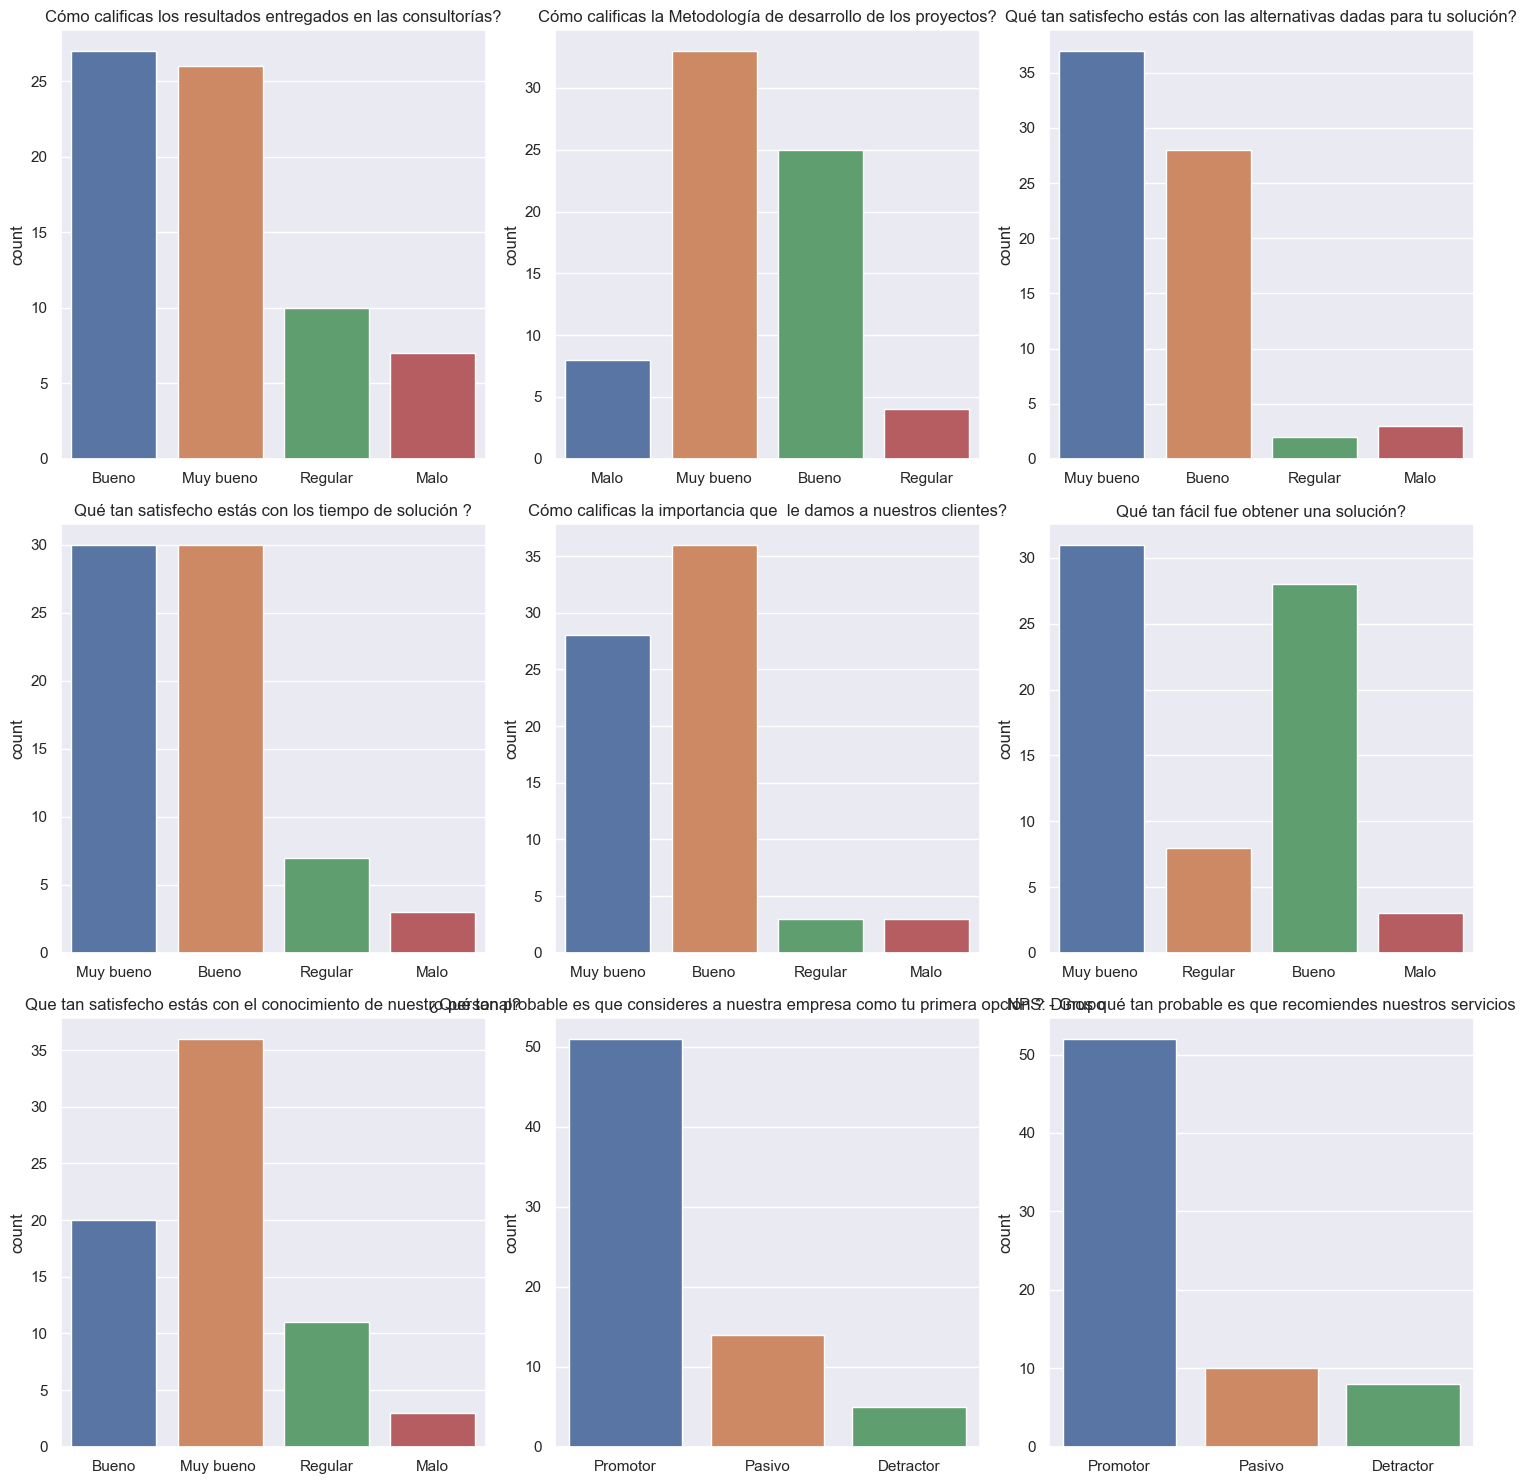

In [10]:
# obteniendo los nombres de las columnas object (columnas categoricas)
cat_vars = df.select_dtypes(include='object').columns.tolist()
exclude_vars = ['amplia la importancia de atributos', 'Cuéntanos el motivo de tu calificación']
cat_vars = [var for var in cat_vars if var not in exclude_vars]

# creando una figura con los subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# creando grafico de barras para cada variable categorica
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')
    axs[i].tick_params(axis='x', rotation=0)

# remueve los subplots que queden vacios
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# ajustando los espacios entre subplots
fig.tight_layout()

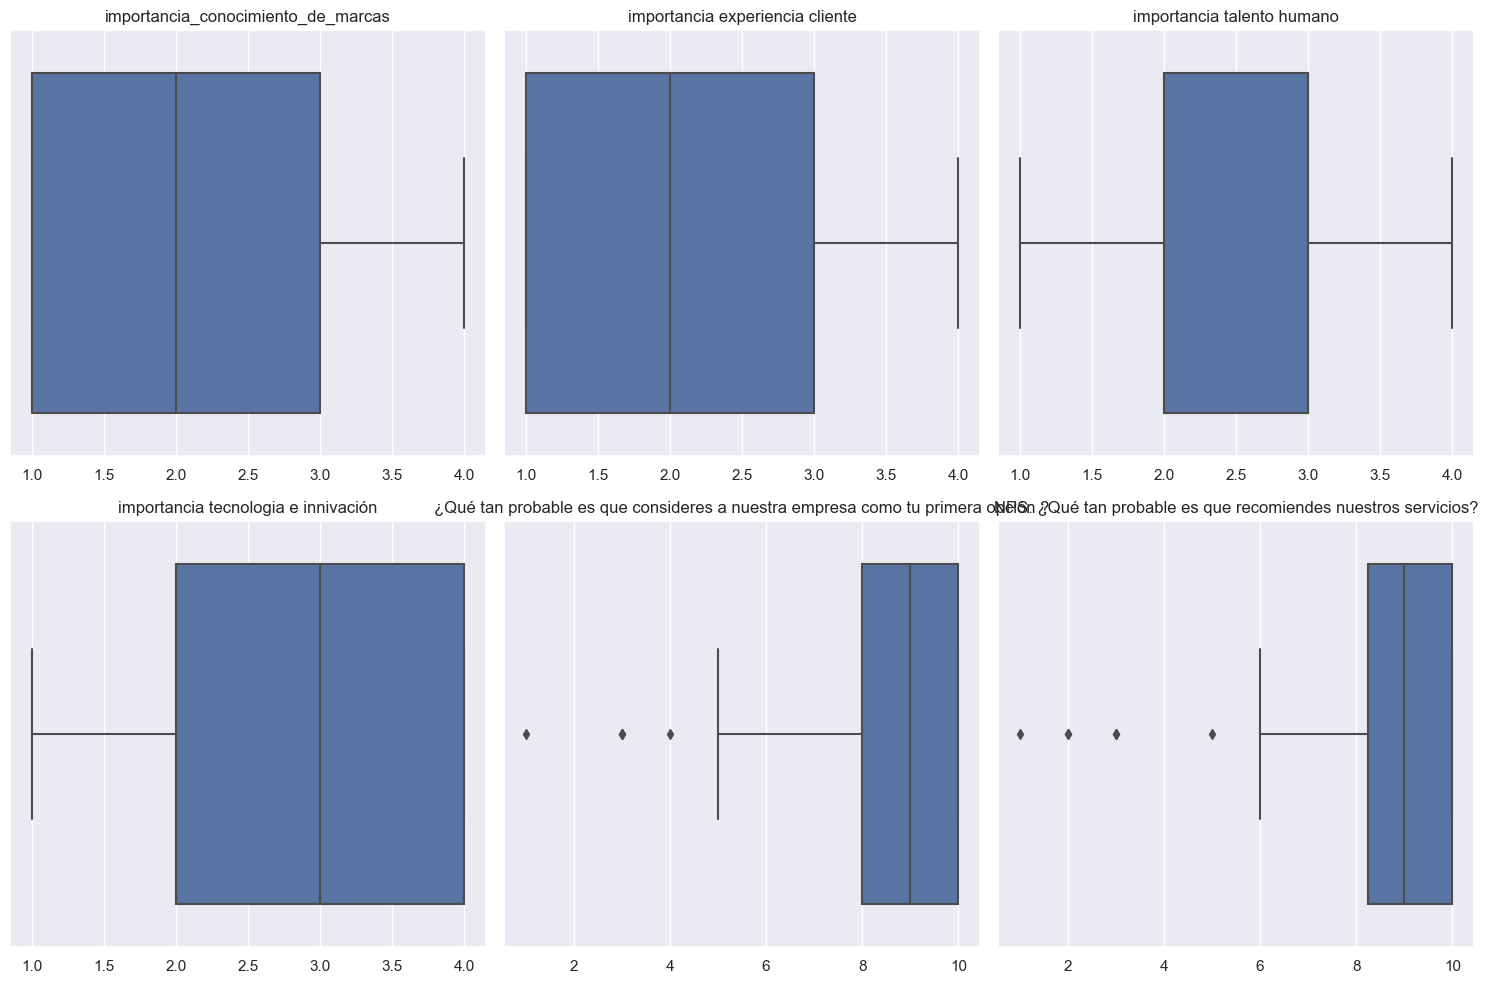

In [11]:
# obteniendo los nombres de las columnas int y float
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# creando una figura con los subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# creando un grafico de barras por cada variable numerica
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')

# remueve los subplots que queden vacios
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# ajustando los espacios entre subplots
fig.tight_layout()

## 1. (20%) Realice un análisis descriptivo detallado de las variables.

Luego de analizar las variables usando estadística descriptiva, se pueden resaltar dos cosas:
- A nivel del cliente se puede evidenciar que el servicio es bueno y existe poco margen de mejora teniendo en cuenta el servicio ofrecido para la muestra.
- Se debe dar más enfásis a la importancia con respecto al conocimiento de la marca, la experiencia al clientey al talento humano, ya que la distribución evidenciada muestra que tal vez existen desviaciones en el proceso que deban mejorarse.

# Conversión de variables categóricas a numéricas

In [12]:
# visualizando los valores de las columnas categoricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Cómo calificas los resultados entregados en las consultorías?: ['Bueno' 'Muy bueno' 'Regular' 'Malo']
Cómo calificas la Metodología de desarrollo de los proyectos?: ['Malo' 'Muy bueno' 'Bueno' 'Regular']
Qué tan satisfecho estás con las alternativas dadas para tu solución?: ['Muy bueno' 'Bueno' 'Regular' 'Malo']
Qué tan satisfecho estás con los tiempo de solución ?: ['Muy bueno' 'Bueno' 'Regular' 'Malo']
Cómo calificas la importancia que  le damos a nuestros clientes?: ['Muy bueno' 'Bueno' 'Regular' 'Malo']
Qué tan fácil fue obtener una solución?: ['Muy bueno ' 'Regular' 'Bueno' 'Malo']
Que tan satisfecho estás con el conocimiento de nuestro personal?: ['Bueno' 'Muy bueno ' 'Regular' 'Malo']
¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo: ['Promotor' 'Pasivo' 'Detractor']
NPS: Dinos qué tan probable es que recomiendes nuestros servicios: ['Promotor' 'Pasivo' 'Detractor']


In [13]:
# transformando columnas categoricas a numericas
for col in df.select_dtypes(include=['object']).columns:
    
    label_encoder = preprocessing.LabelEncoder()
    
    label_encoder.fit(df[col].unique())
    
    df[col] = label_encoder.transform(df[col])
    
    print(f"{col}: {df[col].unique()}")

Cómo calificas los resultados entregados en las consultorías?: [0 2 3 1]
Cómo calificas la Metodología de desarrollo de los proyectos?: [1 2 0 3]
Qué tan satisfecho estás con las alternativas dadas para tu solución?: [2 0 3 1]
Qué tan satisfecho estás con los tiempo de solución ?: [2 0 3 1]
Cómo calificas la importancia que  le damos a nuestros clientes?: [2 0 3 1]
Qué tan fácil fue obtener una solución?: [2 3 0 1]
Que tan satisfecho estás con el conocimiento de nuestro personal?: [0 2 3 1]
¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo: [2 1 0]
NPS: Dinos qué tan probable es que recomiendes nuestros servicios: [2 1 0]


In [14]:
df.head(2)

,importancia_conocimiento_de_marcas,importancia experiencia cliente,importancia talento humano,importancia tecnologia e innivación,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo,¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?,NPS: Dinos qué tan probable es que recomiendes nuestros servicios,NPS: ¿Qué tan probable es que recomiendes nuestros servicios?
0,2.0,3.0,4.0,1.0,0,1,2,2,2,2,0,2,9,2,10
1,3.0,1.0,2.0,4.0,2,2,2,2,2,2,2,2,10,2,10


# Train Test Split

In [15]:
X = df.drop('NPS: ¿Qué tan probable es que recomiendes nuestros servicios?', axis=1)
y = df['NPS: ¿Qué tan probable es que recomiendes nuestros servicios?']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=0)

In [18]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 57.14 %


In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

F-1 Score :  0.5714285714285714
Precision Score :  0.5714285714285714
Recall Score :  0.5714285714285714


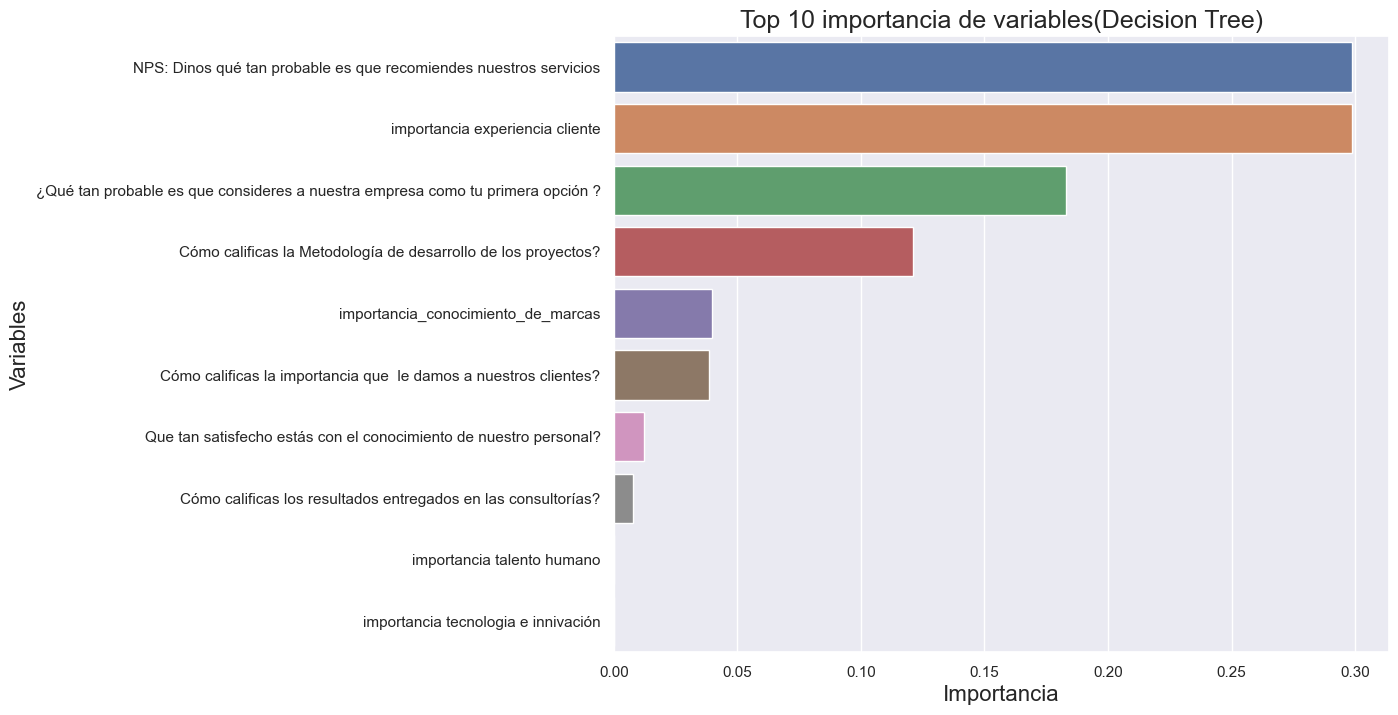

In [20]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 importancia de variables(Decision Tree)', fontsize=18)
plt.xlabel ('Importancia', fontsize=16)
plt.ylabel ('Variables', fontsize=16)
plt.show()

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': None, 'n_estimators': 200, 'random_state': 42}


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [23]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 64.29 %


In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

F-1 Score :  0.6428571428571429
Precision Score :  0.6428571428571429
Recall Score :  0.6428571428571429


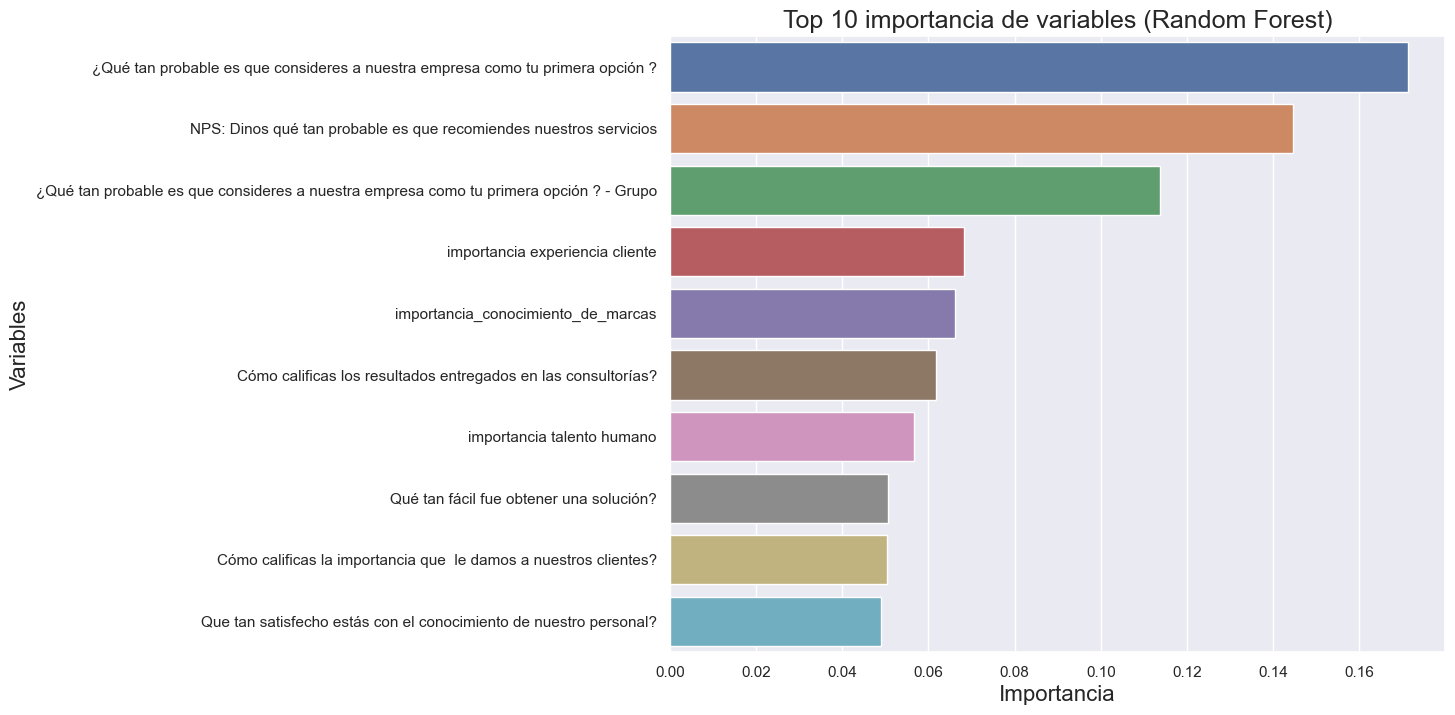

In [25]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 importancia de variables (Random Forest)', fontsize=18)
plt.xlabel ('Importancia', fontsize=16)
plt.ylabel ('Variables', fontsize=16)
plt.show()

## 2.	(40%) Utilizando al menos dos modelos supervisados, prediga la variable NPS (probabilidad de recomendación)

- 2.1 - Se seleccionó el modelo de Random Forest ya que mostró una mejor precisión en las predicciones, sin embargo, existe mucho margen de mejora para el modelo.

- 2.2 - Las variables con más importancia para la medición del modelo son:

"NPS: Dinos qué tan probable es que reocmiendes nuestros servicios"

"¿Qué tan probable es que consideres a nuestra empresa como tu primera opción?"

# 3.	(40%) La encuesta contiene dos preguntas que son de respuesta abierta, en donde los clientes pueden ampliar sus respuestas. (“Amplia la importancia de atributos” y “Cuéntanos el motivo de tu calificación”)

1 - En general el nivel de servicio ofrecido por la empresa ha sido óptimo tomando en cuenta los comentarios de los clientes, ya que se puede evidenciar una satisfacción muy buena en dichos comentarios. Ahora, para realizar un análisis de texto de manera automática propongo crear modelos NLP, para mostrar las conductas de los clientes y tener un análisis más exacto y en tiempo real.

2 - Para el despliegue del modelo a producción, primeramente se debe realizar el ajuste del modelo para aumentar su precisión, luego de esto recomendaría usar algún servicio en la nube ya sea AWS, Azure o GCP para que el modelo este disponible de manera remota para su uso.